In [1]:
import xlsxwriter
import openpyxl
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
%config linelineBacked.figure_format = {'png', 'retina'}
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn.linear_model
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import xlsxwriter
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
#pip install plotly==3.8.1
import cufflinks as cf
import pandas as pd
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

In [61]:
df_final = pd.read_excel("./datas/final_X.xls",'final_X')
df_final = df_final.drop(["Unnamed: 0"], axis=1)
df_final.head()

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country
0,-0.0323,AAPL,"컴퓨터, 전화 및 가전제품",269.0,269.0,-0.012,2001-09-11,테러,테러와의전쟁,1000000,48
1,0.0263,AAPL,"컴퓨터, 전화 및 가전제품",-175.0,175.0,-0.015,2002-01-15,테러,영원한자유작전-필리핀,115800,2
2,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,-0.007,2002-10-07,테러,영원한자유작전-아프리카의뿔,500000,38
3,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.016,2003-03-20,테러,이라크전쟁,1000000,41
4,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.009,2004-04-01,민족,이란-PJAK충돌,17000,3


In [12]:
ls_war_X2 = pd.read_excel('datas/ls_war_X2.xls', sheet_name='sheet')
ls_war_X2

,Start_date,War_name,War_kind,Abs_sum,Count,Count_country,War_volume,War_id
0,2001-09-11,테러와의전쟁,테러,45139,1,48,1000000,w1
1,2002-01-15,영원한자유작전-필리핀,테러,14516,1,2,115800,w2
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,26992,1,38,500000,w3
3,2003-03-20,이라크전쟁,테러,9418,1,41,1000000,w4
4,2004-04-01,이란-PJAK충돌,민족,17026,1,3,17000,w5
5,2004-04-18,예멘의 Houthi 반란,내란,87029,1,7,32000,w6
6,2005-08-27,파라과이인민군반란,내란,17272,1,3,3650,w7
7,2006-01-25,파타-하마스 분쟁,테러,33024,1,3,55000,w8
8,2006-02-22,이라크내전,테러,28136,1,5,748000,w9
9,2006-06-12,2006년레바논전쟁,내란,19732,1,2,10500,w10


## 전쟁은 전쟁규모 순위와 주식변동점수 순위와 동일하지 않다.
 - 전쟁 규모가 크다고 해서, 그 전쟁의 주식평균 변동의 폭이 크다고 할 수 없다.

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], name='전쟁규모', x = ls_war_X2['War_name']))
fig.add_trace(go.Bar(y=ls_war_X2['Abs_sum']*10, name='주식변동점수(X10)', x = ls_war_X2['War_name']))
fig.update_layout(title='<b> 27번의 전쟁의 전쟁규모와 주식변동점수')
fig.show();

## 전쟁 종류에 따라서 전쟁규모순위와  주식변동점수의 순위 또한 다르다.

In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2['War_kind'], name='전쟁규모'))
fig.add_trace(go.Bar(y=ls_war_X2['Abs_sum']*10, x = ls_war_X2['War_kind'], name='평균변화율(X10)'))
fig.update_layout(title='<b> 5가지 갈등종류 : 테러, 민족, 내란, 마약, 해적')
fig.show();

## 갈등종류에 따른 전쟁규모 TOP2

In [22]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2[ls_war_X2['War_kind'] =='테러']['War_name'], name='테러'))
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2[ls_war_X2['War_kind'] =='내란']['War_name'], name='내란'))
fig.update_layout(title='<b> 갈등종류에 따른 전쟁규모 TOP2')
fig.show();

## 참전국가수는 전쟁규모 및 평균변화율의 순위에 영향은 미치지 못한다.

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(y=ls_war_X2['Abs_sum']*10, x = ls_war_X2['Count_country']))
fig.add_trace(go.Bar(y=ls_war_X2['War_volume'], x = ls_war_X2['Count_country']))
fig.update_layout(title='<b> 참여 국가수에 대한 평균변화율')
fig.show();

## Symblo industry 전체 리스트 정보

In [28]:
industry = pd.read_csv("./datas/SYMB_Industry.csv")
industry

,Industry,IndustryCode
0,"건설 장비 및대형차, 기차, 배",521020
1,다양한 소매업,533010
2,레저 상품,532050
3,미디어 및 출판,533020
4,반도체 및 반도체 장비,571010
5,생명과학 및 메디컬 리서치,562020
6,섬유 및 의류,532020
7,소프트웨어 및 IT 서비스,572010
8,식품 및 담배,541020
9,식품 및 약품소매,543010


In [33]:
df_final = pd.read_excel("./datas/final_X.xls",'final_X')
df_final = df_final.drop(["Unnamed: 0"], axis=1)
df_final

,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country
0,-0.0323,AAPL,"컴퓨터, 전화 및 가전제품",269.0,269.0,-0.012,2001-09-11,테러,테러와의전쟁,1000000,48
1,0.0263,AAPL,"컴퓨터, 전화 및 가전제품",-175.0,175.0,-0.015,2002-01-15,테러,영원한자유작전-필리핀,115800,2
2,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,-0.007,2002-10-07,테러,영원한자유작전-아프리카의뿔,500000,38
3,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.016,2003-03-20,테러,이라크전쟁,1000000,41
4,0.0000,AAPL,"컴퓨터, 전화 및 가전제품",0.0,0.0,0.009,2004-04-01,민족,이란-PJAK충돌,17000,3
...,...,...,...,...,...,...,...,...,...,...,...
1013,0.0012,GOOG,소프트웨어 및 IT서비스,30.0,30.0,0.004,2014-05-16,내란,리비아 내전,400000,19
1014,0.0007,GOOG,소프트웨어 및 IT서비스,-70.0,70.0,-0.001,2014-06-13,테러,ISIL에대한국제군사개입,472260,41
1015,0.0120,GOOG,소프트웨어 및 IT서비스,-200.0,200.0,-0.006,2014-09-16,내란,예멘내전,156000,19
1016,-0.0426,BABA,소프트웨어 및 IT서비스,1065.0,1065.0,-0.004,2014-09-16,내란,예멘내전,156000,19


In [ ]:
#### (그래프)전쟁별 참전국수

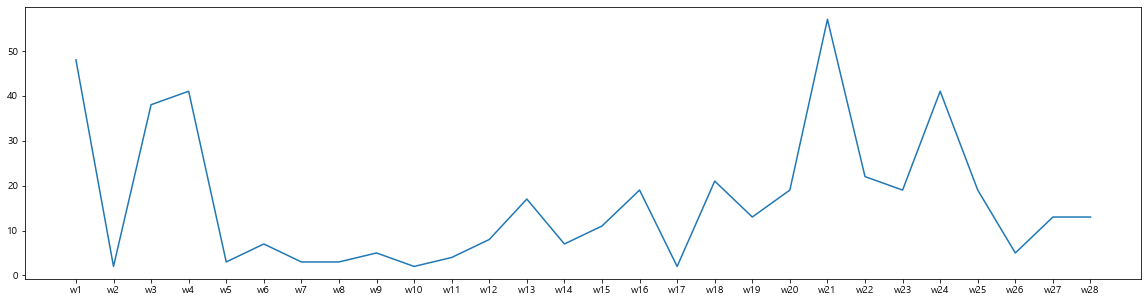

In [32]:
plt.figure(figsize=(20,5))
X = ls_war_X2["War_id"]
y_1 = ls_war_X2["Count_country"]
plt.plot(X, y_1)
plt.show()

In [34]:
#### (그래프)전쟁별 전쟁규모

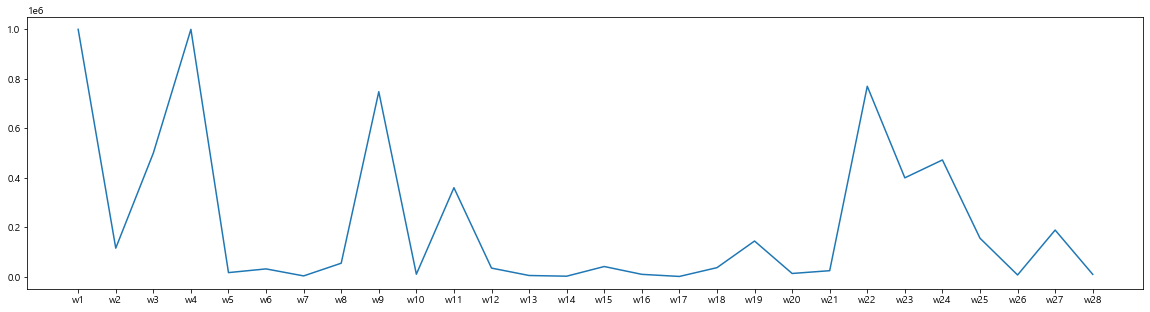

In [35]:
plt.figure(figsize=(20,5))
X = ls_war_X2["War_id"]
y_2 = ls_war_X2["War_volume"]
plt.plot(X, y_2)
plt.show()

In [36]:
### (1)-1 전쟁종류(민족간전쟁/해적/마약/테러)별 전쟁수 count

In [42]:
ls_war_X2 = pd.read_excel("datas/ls_war.xls", "sheet")
ls_war_X2 = ls_war_X2.drop(["Unnamed: 0","전쟁수"], axis=1)
ls_war_X2["Count"] = 1
ls_war_X2["War_volume"] = ls_war["참전국수"]
ls_war_X2.head()

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3


In [43]:
war_genre = ls_war_X2.pivot_table("Count","갈등종류", aggfunc=np.sum, fill_value=0)
war_genre["War_genre"]= war_genre.index
war_genre

,Count,War_genre
갈등종류,,
내란,12,내란
마약,2,마약
민족,2,민족
테러,10,테러
해적,2,해적


In [44]:
#### (그래프) 2000년이후 갈등종류별 전쟁수

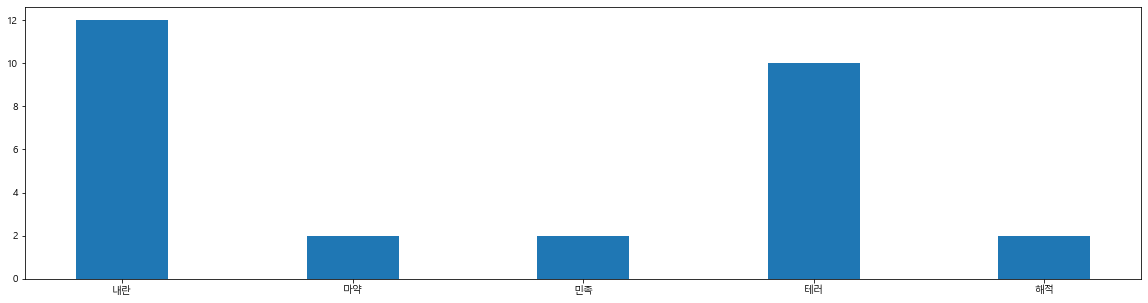

In [45]:
plt.figure(figsize=(20,5))
X = war_genre["War_genre"]
y = war_genre["Count"]
plt.bar(X, y, width=0.4)
plt.show()

In [46]:
### (1)-2 전쟁참전국수별 (0~20, 21~40, 41개국이상) 전쟁수 count

In [48]:
 # 10개국 미만 참전 "소규모"
a= ls_war_X2[ls_war_X2["참전국수"]<=10]
a

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3
5,2004-04-18,예멘의 Houthi 반란,내란,32000,7,1,7
6,2005-08-27,파라과이인민군반란,내란,3650,3,1,3
7,2006-01-25,파타-하마스 분쟁,테러,55000,3,1,3
8,2006-06-12,2006년레바논전쟁,테러,10500,2,1,2
9,2006-02-22,이라크내전,내란,748000,5,1,5
10,2006-12-11,멕시코마약전쟁,마약,360000,4,1,4
11,2006-12-30,소말리아전쟁,해적,35250,8,1,8
13,2008-03-25,2008 안주안침공,내란,2500,7,1,7


In [50]:
# 11~20개국 참전 "중간규모"
b= ls_war[(ls_war_X2["참전국수"] > 10)&(ls_war_X2["참전국수"] <= 20)] 
b

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
12,2007-02-06,영원한자유작전-트랜스사하라,테러,5325,17,1,17
14,2009-07-26,보코하람반란,내란,10000,19,1,19
15,2009-01-31,소말리아내전,해적,41600,11,1,11
18,2011-03-15,시리아내전,내란,144600,13,1,13
19,2011-06-17,레바논에서의시리아내전파급,내란,13500,19,1,19
22,2014-05-16,리비아 내전,내란,400000,19,1,19
24,2014-09-16,예멘내전,내란,156000,19,1,19
26,2017-12-09,이라크반란,내란,188900,13,1,13
27,2019-05-05,2019-20 페르시아만위기,민족,10000,13,1,13


In [51]:
 # 20개국 초과 참전 "대규모"
c= ls_war[(ls_war["참전국수"] > 20)]
c

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
17,2011-02-15,리비아내전,내란,37000,21,1,21
20,2012-01-16,북부말리전쟁,테러,24764,57,1,57
21,2013-12-30,이라크 내전,내란,770000,22,1,22
23,2014-06-13,ISIL에대한국제군사개입,테러,472260,41,1,41


In [52]:
#### (그래프) 2000년이후 전쟁의 참전국 규모에 따른 전쟁수(소,중,대)

In [ ]:
### (1)-3 전쟁규모별 (병력수 1k이하, 10k미만, 10k이상) 전쟁수 count

In [54]:
# 병력 3만미만 참전 "S1"
a_1= ls_war[ls_war_X2["전쟁규모"]<30*1000]
a_1

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_Scale
4,2004-04-01,이란-PJAK충돌,민족,17000,3,1,3
6,2005-08-27,파라과이인민군반란,내란,3650,3,1,3
8,2006-06-12,2006년레바논전쟁,테러,10500,2,1,2
12,2007-02-06,영원한자유작전-트랜스사하라,테러,5325,17,1,17
13,2008-03-25,2008 안주안침공,내란,2500,7,1,7
14,2009-07-26,보코하람반란,내란,10000,19,1,19
16,2010-05-23,킹스톤불안,마약,1500,2,1,2
19,2011-06-17,레바논에서의시리아내전파급,내란,13500,19,1,19
20,2012-01-16,북부말리전쟁,테러,24764,57,1,57
25,2017-05-23,마라위위기,테러,7500,5,1,5


In [55]:
# 3~50만병력 참전 "S2"
b_2= ls_war_X2[(ls_war_X2["전쟁규모"] >= 30*1000)&(ls_war_X2["전쟁규모"] < 500*1000)] 
b_2

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
1,2002-01-15,영원한자유작전-필리핀,테러,115800,2,1,2
5,2004-04-18,예멘의 Houthi 반란,내란,32000,7,1,7
7,2006-01-25,파타-하마스 분쟁,테러,55000,3,1,3
10,2006-12-11,멕시코마약전쟁,마약,360000,4,1,4
11,2006-12-30,소말리아전쟁,해적,35250,8,1,8
15,2009-01-31,소말리아내전,해적,41600,11,1,11
17,2011-02-15,리비아내전,내란,37000,21,1,21
18,2011-03-15,시리아내전,내란,144600,13,1,13
22,2014-05-16,리비아 내전,내란,400000,19,1,19
23,2014-06-13,ISIL에대한국제군사개입,테러,472260,41,1,41


In [67]:
# 50만이상 병력투입
c= ls_war_X2[(ls_war_X2["전쟁규모"] >= 500*1000)] 
c

,발발시점,갈등이름,갈등종류,전쟁규모,참전국수,Count,War_volume
0,2001-09-11,테러와의전쟁,테러,1000000,48,1,48
2,2002-10-07,영원한자유작전-아프리카의뿔,테러,500000,38,1,38
3,2003-03-20,이라크전쟁,테러,1000000,41,1,41
9,2006-02-22,이라크내전,내란,748000,5,1,5
21,2013-12-30,이라크 내전,내란,770000,22,1,22


In [58]:
#### (그래프) 2000년이후 전쟁병력규모에 따른 전쟁수

In [59]:
## (2) Symbol별 ABS_idx

In [64]:

df_final = pd.read_excel("./datas/final_X.xls",'final_X')

#df_final = df_final.drop(["Unnamed: 0", "Unnamed: 0.1", "Date"], axis=1)
df_final["Count"] = 1
df_final.tail(3)

,Unnamed: 0,Change,Symbol,Industry,Change_idx,ABS_idx,Avg_change,Start_date,War_genre,War_name,War_volume,Count_country,Count
1015,1015,0.0120,GOOG,소프트웨어 및 IT서비스,-200.0,200.0,-0.006,2014-09-16,내란,예멘내전,156000,19,1
1016,1016,-0.0426,BABA,소프트웨어 및 IT서비스,1065.0,1065.0,-0.004,2014-09-16,내란,예멘내전,156000,19,1
1017,1017,-0.0025,PYPL,소프트웨어 및 IT서비스,62.0,62.0,-0.004,2014-09-16,내란,예멘내전,156000,19,1


### (2)-1 ABS_idx 0~199 / 200이상 Sympbol 수 -> 비율도 보기

In [68]:
s_count_1 = df_final[(df_final["ABS_idx"] < 200)] # 
s_count_2 = df_final[(df_final["ABS_idx"] >= 200)]
len(s_count_1), len(s_count_2)

(523, 494)

In [69]:
### ABS 200기준 전체 심볼비중
#### 전쟁 중 발생된 1500개의 ABS_idx 값 중 200이상인 값은 51%

In [70]:
s_count_ratio = len(s_count_2) / (len(s_count_1) + len(s_count_2) )
len(s_count_1), len(s_count_2), round(s_count_ratio,2)

(523, 494, 0.49)

In [71]:
#### 전쟁종류별비중 ( 정리 요망)
s_count_11 = df_final[(df_final["War_genre"] ==  "내란")]
s_count_11_1 = s_count_11[(df_final["ABS_idx"] < 200)]
s_count_11_2 = s_count_11[(df_final["ABS_idx"] >= 200)]
s_count_11_ratio = len(s_count_11_2) / (len(s_count_11_1)+len(s_count_11_2))
len(s_count_11_1), len(s_count_11_2), round(s_count_11_ratio, 2)

<ipython-input-71-721f97fe592c>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-71-721f97fe592c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(247, 210, 0.46)

In [72]:
s_count_12 = df_final[(df_final["War_genre"] ==  "민족")]
s_count_12_1 = s_count_12[(df_final["ABS_idx"] < 200)]
s_count_12_2 = s_count_12[(df_final["ABS_idx"] >= 200)]
s_count_12_ratio = len(s_count_12_2) / (len(s_count_12_1)+len(s_count_12_2))
len(s_count_12_1), len(s_count_12_2), round(s_count_12_ratio, 2)

<ipython-input-72-7b99e999a94c>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-72-7b99e999a94c>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(25, 15, 0.38)

In [73]:
s_count_13 = df_final[(df_final["War_genre"] ==  "테러")]
s_count_13_1 = s_count_13[(df_final["ABS_idx"] < 200)]
s_count_13_2 = s_count_13[(df_final["ABS_idx"] >= 200)]
s_count_13_ratio = len(s_count_13_2) / (len(s_count_13_1)+len(s_count_13_2))
len(s_count_13_1), len(s_count_13_2), round(s_count_13_ratio, 2)

<ipython-input-73-87e1d89d025a>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-73-87e1d89d025a>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(171, 172, 0.5)

In [74]:
s_count_14 = df_final[(df_final["War_genre"] ==  "마약")]
s_count_14_1 = s_count_14[(df_final["ABS_idx"] < 200)]
s_count_14_2 = s_count_14[(df_final["ABS_idx"] >= 200)]
s_count_14_ratio = len(s_count_14_2) / (len(s_count_14_1)+len(s_count_14_2))
len(s_count_14_1), len(s_count_14_2), round(s_count_14_ratio, 2)

<ipython-input-74-9fd95bd51d5b>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-74-9fd95bd51d5b>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(52, 37, 0.42)

In [75]:
s_count_15 = df_final[(df_final["War_genre"] ==  "해적")]
s_count_15_1 = s_count_15[(df_final["ABS_idx"] < 200)]
s_count_15_2 = s_count_15[(df_final["ABS_idx"] >= 200)]
s_count_15_ratio = len(s_count_15_2) / (len(s_count_15_1)+len(s_count_15_2))
len(s_count_15_1), len(s_count_15_2), round(s_count_15_ratio, 2)

<ipython-input-75-2a0cb356a494>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-75-2a0cb356a494>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(28, 60, 0.68)

In [76]:
# 전쟁 반발시 100대기업의 51% 종목이 영향을 받는데
# 해적관련된 전쟁일 경우 영향을 받는 종목이 67%로 가장 많았고
# 테러, 마약관련 전쟁의 경우 50% 수준
# 민족간의 갈등전쟁에서는 상대적으로 적은 종목이 영향을 받음

# 이거 DataFrame으로 정리해서 그래프로 그리기

In [77]:
len(s_count_11_1), len(s_count_11_2),

(247, 210)

In [78]:
### (2)-2 (인스더스트리별) ABS_idx 0~199 / 200이상 Symbol 수 -> 비율도 보기

In [79]:
symbol = df_final.pivot_table("Count", "Symbol")
symbol["Symbol"] = symbol.index

In [80]:
indX = pd.read_csv("datas/industry_code.csv")
df_3 = indX.drop(['Unnamed: 0', 'IndustryCode', 'Name'], axis=1)
df_3.tail()

,Symbol,Industry
7210,RHE,부동산 운영 관리
7211,BTX,미디어 및 출판
7212,PW PR A,주택 및 상업용 리츠
7213,IPB,은행
7214,VHAQ RT,기타 금융업
